# Titanic - Projeto Final

## Introdução
O acidente do Titanic é o mais famoso acidente marítimo já ocorrido. Toda essa fama veio do filme Titanic de 1997. O acidente ocorreu no dia 15 de abril de 1915 e 1502 tripulantes dos 2224 que estavam a bordo morreram.  No entanto, alguns grupos de pessoas tiveram uma maior taxa de sobrevivência. Sendo assim, neste projeto será analisado informações de 891 passageiros do RMS Titanic para extrairmos informações relevantes sobre o ocorrido.

### Variáveis do conjunto de dados
Variável|Definição|Chave
--------|---------|-----
survival|Sobrevivencia|0 = Não, 1=Sim
pclass|Classe da passagem|1=Primeira,2=Segunda,3=Terceira
sex|Sexo
Age|Idade em anos
sibsp|# de irmãos/esposx à bordo
parch|# de pais/filho à bordo
fare|Preço da passagem
cabin|Número da cabine
embarked|Porto de embarque|C = Cherbourg,Q = Queenstown, S=Southampton


In [1]:
# Escreva aqui os imports, no mínimo você vai usar pandas, numpy e matplotlib 
# também pode-se usar outras bibliotecas se desejar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Não esqueça que para o matplotlib plotar a baixo da célula é precisa adicionar
# o código especial.
%matplotlib inline

In [2]:
# Abra o arquivo CSV e mostre algumas linhas
df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Perguntas


- Mulheres e crianças tiveram maior taxa de sobrevivencia comparado com outros grupos?

Está pergunta foi baseada no fato que no filme Titanic o capitão ordena que a evacuação de mulheres e crianças seja feita primeiro.

- Qual foi a relação entre a taxa de sobrevivencia com o número de parentes à bordo?

Parentes tendem a cuidar um do outro.

- Qual é a distribuição da tripulação por idade e a distribuição de sobreviventes por idade?

- Quantidade preço médio para passagens para cada classe?

- Qual a taxa de sobrevivencia dentro de cada classe?

Analisando se o aspecto financeiro influenciou na taxa de sobrevivencia.

## Limpeza dos dados

Primeiro passo é verificar o estado inicial dos dados

In [3]:
# Verificação inicial
df_titanic.info()
#Dados duplicados
print('{} linhas duplicadas'.format(df_titanic.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
0 linhas duplicadas


Pela verificação inicial podemos ver que:
- Precisamos transformar os nomes das colunas para minusculo
- Existem dados faltantes nas colunas *Age*,*Cabin* e *Embarked*
- Eliminar colunas que não serão usadas para o estudo

Primeiramente, transformaremos o nome das colunas para minusculo

In [4]:
df_titanic = df_titanic.rename(str.lower, axis='columns')

Excluindo as colunas *Ticket* e *Cabin*, pois, no momento, não coseguimos extrair informações de *Ticket* e temos muitos dados faltantes de *Cabin*

In [5]:
df_titanic = df_titanic.drop(['cabin','ticket'],axis='columns')

Lidando com os valores nulos.

Para a coluna *age* preencheremos os dados nulos com a media da idade

Para a coluna *embarked* preencheremos com a Moda

In [6]:
# Preenchendo a coluna Age com a média
def fill_na_col_mean(df,column):
    """
    Fill the NaN values of a column in a dataframe with the mean of the values
    of the own column
    Args:
        df(Pandas.DataFrame)
        column(String):Label of the column
    Returns:
        Pandas.DataFrame
    """
    mean = np.rint(np.mean(df[column]))
    return df.fillna(value={column:mean})

df_titanic = fill_na_col_mean(df_titanic,'age')

In [7]:
# Preenchendo a coluna embarked com a moda
def fill_na_col_mode(df,column):
    """
    Fill the NaN values of a column in a dataframe with the mode of the values
    of the own column
    Args:
        df(Pandas.DataFrame)
        column(String):Label of the column
    Returns:
        Pandas.DataFrame
    """
    mode = df[column].mode()[0]
    return df.fillna(value={column:mode})

df_titanic = fill_na_col_mode(df_titanic,'embarked')

Verificando se os dados contem duplicatas

In [8]:
df_titanic.duplicated().any()

False

Verificando o estado final dos dados

In [9]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Finalizado a limpeza podemos salvar os dados

In [10]:
df_titanic.to_csv('titanic_clean.csv',index=False)

## Análise

Fale um pouco do processo e forma que pretende analisar os dados, também use pelo menos dois tipos diferentes de gráficos.

O site do matplotlib é cheio de exemplos que você pode seguir e usar em seu projeto. Também não é preciso se limitar apenas ao matplotlib, existem outras bibliotecas gráficas, um exemplo é o seaborn.

Ao final de análisar cada dado e figura gerada faça uma explicação dos resultados respondendo a sua pergunta. Tente falar de forma simples mas completa.

In [11]:
# Lendo o arquivo CSV limpo

df_titanic = pd.read_csv('titanic_clean.csv',index_col=0)
df_titanic.head(2)

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
passengerid,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


### P1.Mulheres e crianças tiveram maior taxa de sobrevivencia comparado com outros grupos?
**Obs.:** De acordo com os Direitos da Criança da ONU, uma criança é qualquer individuo com idade menor que 18 anos

In [12]:
# Separando o conjunto de mulheres e criancas
df_wm_ch = df_titanic.query('sex == "female" or age < 18')

In [13]:
#funcao para calcular a taxa de sobrevivencia
def surv_rate(df):
    """
    Find the survival rate of a dataframe of the Kaggle Titanic dataset
    Args:
        df(Pandas.DataFrame)
    Returns:
        float with the survivale rate
    """
    surv_group = df.query('survived == 1')
    return (surv_group.shape[0]/df.shape[0])*100

In [14]:
#Comparação
print('{:.2f} porcento das pessoas sobreviveram ao acidente'.format(surv_rate(df_titanic)))
print('{:.2f} porcento das mulheres e crianças sobreviveram ao acidente'.format(surv_rate(df_wm_ch)))

38.38 porcento das pessoas sobreviveram ao acidente
68.82 porcento das mulheres e crianças sobreviveram ao acidente


Analisando a quatidade de sobreviventes por faixa etária somente

In [15]:
#separando por faixa etaria
df_titanic["faixa_etaria"] = pd.cut(df_titanic.age, [0, 18, 60, 150], labels=["criancas", "adultos", "idosos"])

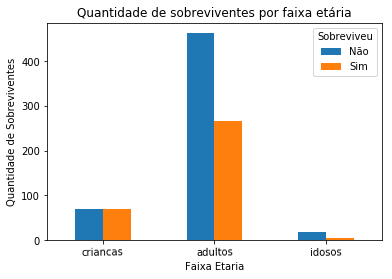

In [16]:
#Plotando o gráfico
df_titanic.groupby(['faixa_etaria','survived']).size().unstack().rename(columns={0:'Não',1:'Sim'}).plot.bar(rot=1)
plt.xlabel('Faixa Etaria')
plt.ylabel('Quantidade de Sobreviventes')
plt.legend(title='Sobreviveu')
plt.title('Quantidade de sobreviventes por faixa etária');

Analisando a quantidade de sobreviventes por sexo

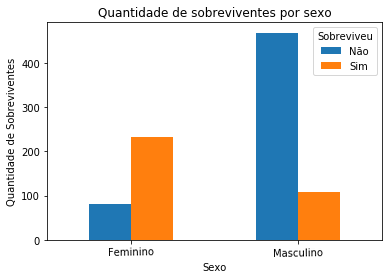

In [17]:
df_titanic.groupby(['sex','survived']).size().unstack().rename(columns={0:'Não',1:'Sim'}
                                                              ,index={'male':'Masculino'
                                                                     ,'female':'Feminino'}).plot.bar(rot=1)
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Sobreviventes')
plt.legend(title='Sobreviveu')
plt.title('Quantidade de sobreviventes por sexo');

Pela comparação entre a taxa de sobrevivência geral do Titanic com a taxa de sobrevivência de mulheres e criança podemos perceber que este grupo teve uma taxa duas vezes maior que a geral.

Agora, comparando a quantidade de sobreviventes por faixa etária podemos notar que crianças tem um número,aproximadamente, igual de sobreviventes e não sobreviventes. Enquanto as outras faixas tem um número maior de não sobreviventes.

Quando comparamos a quantidade de sobreviventes por sexo, claramente, notamos que os passageiros do sexo feminino tem um número bem maior de sobreviventes. Enquanto os passageiros do sexo masculino tem um número bem maior de não sobreviventes.  

### P2.Qual foi a relação entre a taxa de sobrevivencia com o número de parentes à bordo?

O número de parentes será considerado como a soma das colunas *sibsp* e *parch*

In [18]:
#Criando a coluna que representa a quantidade de parentes à bordo
df_titanic['relatives'] = df_titanic['sibsp'] + df_titanic['parch']

In [19]:
#Grafico de barras da taxa de sobreviventes por quantidade de parentes
#Calculando as quantidades relativas
survivors = df_titanic.query('survived == 1')
surv_per_relative = survivors['relatives'].value_counts()
total_per_relative = df_titanic['relatives'].value_counts()
print(total_per_relative)
rate_relatives = surv_per_relative/total_per_relative
print(rate_relatives)
#Precisamos substituir os valores NaN por zero
rate_relatives = rate_relatives.fillna(0)

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7          NaN
10         NaN
Name: relatives, dtype: float64


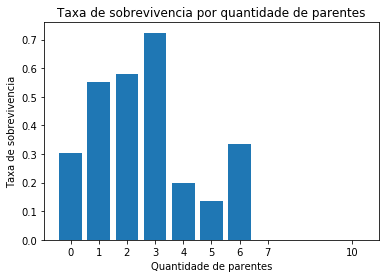

In [20]:
#Plotando grafico
plt.bar(rate_relatives.index,rate_relatives.values)
plt.xlabel('Quantidade de parentes')
plt.ylabel('Taxa de sobrevivencia')
plt.xticks(rate_relatives.index)
plt.title('Taxa de sobrevivencia por quantidade de parentes');

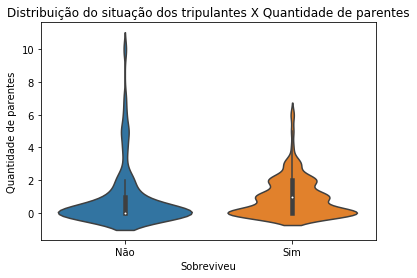

In [21]:
#Plotando gráfico de violino
g = sns.violinplot(x='survived',y='relatives',data=df_titanic)
g.set(xticklabels=['Não','Sim'])
plt.xlabel('Sobreviveu')
plt.ylabel('Quantidade de parentes')
plt.title('Distribuição do situação dos tripulantes X Quantidade de parentes');

Pelo gráfico da violino podemos notar que da população que não sobreviveu a maioria está concentrada em tripulantes com nenhum parente a bordo e da população que sobreviveu a distribuição está mais distribuida na região com até 4 parentes.

Junto com o gráfico da taxa de sobrevivência por quantidade de parentes podemos perceber uma correlação entre sobreviventes e uma quantidade de parentes à bordo maior que zero e menor que 4.

### P3.Qual é a distribuição da tripulação por idade e a distribuição de sobreviventes por idade?

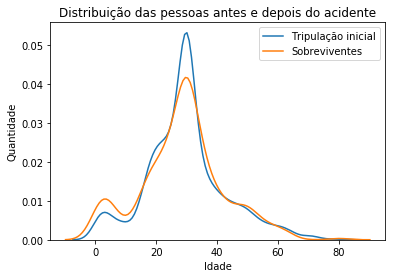

In [22]:
#Plotando a distribuição por idade
sns.kdeplot(df_titanic['age'], label='Tripulação inicial')
#Plotando a distribuição de sobreviventes por idade
sns.kdeplot(df_titanic.query('survived == 1')['age'],label='Sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.legend()
plt.title('Distribuição das pessoas antes e depois do acidente');

A comparação entre a distribuição antes e depois do acidente comprova o achado da pergunta 1, mostrando uma diminuição de adultos e um aumento de crianças.

### P4.Quantidade preço médio para passagens para cada classe?

In [23]:
#Encontrando o preço por class
price_class = df_titanic.groupby('pclass').mean()['fare']
for classe,preco in price_class.iteritems():
    print('O preço medio para a {} classe é de {:.2f} dolares.'.format(classe,preco))

O preço medio para a 1 classe é de 84.15 dolares.
O preço medio para a 2 classe é de 20.66 dolares.
O preço medio para a 3 classe é de 13.68 dolares.


Através de uma pesquisa na internet pude concluir que os valores dos preços das passagens estão em dolares.

### P5.Qual a taxa de sobrevivencia dentro de cada classe?

In [24]:
#Separando os dados por class
df_primeira = df_titanic.query('pclass == 1')
df_segunda = df_titanic.query('pclass == 2')
df_terceira = df_titanic.query('pclass == 3')
#Mostrando os resultados
print('A taxa de sobrevivencia para a primeira classe é de {:.2f} porcento'.format(surv_rate(df_primeira)))
print('A taxa de sobrevivencia para a segunda classe é de {:.2f} porcento'.format(surv_rate(df_segunda)))
print('A taxa de sobrevivencia para a terceira classe é de {:.2f} porcento'.format(surv_rate(df_terceira)))

A taxa de sobrevivencia para a primeira classe é de 62.96 porcento
A taxa de sobrevivencia para a segunda classe é de 47.28 porcento
A taxa de sobrevivencia para a terceira classe é de 24.24 porcento


Podemos notar que, como foi mostrado no filme Titanic, os tripulantes com melhor condição tiveram uma maior taxa de sobrevivência.

## Resultados

P1:

Os dados obtidos comprovam o que foi mostrado no filme que mulheres e crianças tiveram uma maior taxa de sobrevivencia.

P2:

A estudo mostra uma correlação entre a os sobreviventes e o fato da passegeiro estar viajando com uma pequena quantidade de parentes próximos

P3:

A distribuição das pessoas antes e depois do acidente mostra a diminuição da população de adultos e um aumento na população de crianças.

P4.

Classe|Preço Médio(US$)
------|---------------
1|84,15
2|20,66
3|13,68

P5.

O estudo mostra que a condição financeira influenciou na taxa de sobrevivencia dos passageiros.Uma vez que a taxa de sobrevivencia dos passageiros de primeira classe foi quase 3 vezes maior que a de passageiros de terceira classe.


### Problemas encontrados

Um dos problemas encontrados foi como lidar com os valores ausentes da coluna da idade, que alterou a precisão do estudo feito para responder a pergunta 1.

Porém o maior dos problema é a falta de ferramentas para tirar conclusões dos dados, pois neste estudo foi utilizado somente estatística descritiva.

## Bibliografia

[Mastering Markdown](https://guides.github.com/features/mastering-markdown/)

[Kaggle Titanic](https://www.kaggle.com/c/titanic/data)

[Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)

[Numpy References](https://docs.scipy.org/doc/numpy-1.16.1/reference/)

[Matplotlib Exemples](https://matplotlib.org/gallery/index.html)

[StackOverflow](https://stackoverflow.com/)

[Quora](https://www.quora.com/What-were-the-ticket-prices-to-board-the-Titanic)

[Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)
[Seaborn Tutorial](http://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)